In [22]:
import numpy as np
import pandas as pd
import efficientnet.keras as efn
from keras.models import load_model
from sklearn.metrics import  accuracy_score, confusion_matrix

In [23]:
model = load_model('models/12_effnet_b4_model.hdf5')

In [3]:
# from data.dataset import loadDatabase
# train_generator, validation_generator, test_generator2 = loadDatabase(False)

In [24]:
from data.dataset import loadTESTDatabase
test_generator = loadTESTDatabase()

Found 3359 validated image filenames belonging to 60 classes.


In [5]:
test_generator.reset()

pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
predicted_class_indices = np.argmax(pred, axis=1)

pred.shape

210/210 [==============================] - 1534s 7s/step

(3359, 60)

In [6]:
with open('2_full_test.npy', 'wb') as f:
    np.save(f, pred)
with open('2_full_test.npy', 'rb') as f:
    a = np.load(f)
# print(a)

In [7]:
# label_map = (test_generator4.class_indices)
# label_map = dict((v,k) for k,v in label_map.items())
# predictions = [label_map[k] for k in predicted_class_indices]
# predictions.shape

In [8]:
#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

results = pd.DataFrame({"Filename": test_generator.filenames,
                        "Predictions": predicted_class_indices,
                        "TRUE class": test_generator.classes})

results.to_csv(r'2_full_test_result.csv')
#

In [9]:
accuracy_score(test_generator.classes, predicted_class_indices)

0.841024114319738

In [10]:
pred > 0.5

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

In [11]:
y_true = test_generator.classes
y_pred = pred > 0.5

confusion_matrix(y_true, y_pred)


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
model.evaluate_generator(test_generator, len(test_generator), verbose=1)



In [ ]:
acc = model.evaluate_generator(test_generator, len(test_generator) // 16, verbose=1)
acc
print(acc)

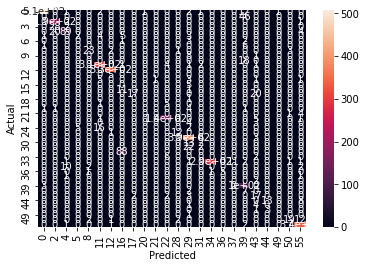

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.DataFrame(columns=['y_Actual','y_Predicted'])
df['y_Actual'] = test_generator.classes
df['y_Predicted'] = predicted_class_indices
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [15]:
from pandas_ml import ConfusionMatrix

Confusion_Matrix = ConfusionMatrix(df['y_Actual'], df['y_Predicted'])
Confusion_Matrix.print_stats()



AttributeError: module 'sklearn.metrics' has no attribute 'jaccard_similarity_score'

In [19]:
with open('test.npy', 'rb') as f:
    a = np.load(f)
print(a)

[[5.3603053e-03 2.1738801e-03 1.2498753e-08 ... 4.1391411e-07
  1.3091127e-06 2.5668926e-06]
 [3.2632938e-03 4.9022217e-03 1.8350958e-08 ... 7.5012917e-07
  1.9053465e-06 1.9776619e-06]
 [2.5732725e-06 2.5064418e-07 9.9902070e-01 ... 1.5209952e-07
  1.7395118e-08 8.6200203e-08]
 ...
 [6.8455607e-02 2.4781360e-03 3.1260736e-03 ... 1.7674869e-05
  2.0477883e-05 2.3825305e-06]
 [1.0201972e-01 9.1994833e-04 5.0650463e-02 ... 3.4377888e-05
  8.8557848e-05 1.6673831e-06]
 [1.4212547e-04 4.3532923e-06 9.5952731e-01 ... 2.5284286e-05
  1.5047942e-05 5.8046885e-07]]


In [18]:
# results.to_csv(r'2_full_test_result.csv')

# with open('testtesttesttest1111.csv', 'wb') as f:
#     np.save(f, results)
# with open('testtesttesttest1111.csv', 'rb') as f:
#     a = np.load(f)
# print(a)


ValueError: Object arrays cannot be loaded when allow_pickle=False

In [ ]:
import atexit
import signal
from functools import partial

def done_function(fileName, toSave):
    with open(fileName, 'wb') as f:
        np.save(f, toSave)
    with open(fileName, 'rb') as f:
        a = np.load(f)
    print(a)
    print('WWWWWWWWWWWWW')

pred222 = np.array([])
atexit.register(done_function, fileName='testtesttesttest22.npy', toSave=pred222)

for sig in signal.valid_signals():
    print(f'{sig.value}: signal.{sig.name},')
    signal.signal(sig, partial(done_function, fileName='testtesttesttest22.npy', toSave=pred222))

# signal.signal(signal.SIGTERM, partial(done_function, fileName='testtesttesttest22.npy', toSave=pred222))
# signal.signal(signal.SIGINT, partial(done_function, fileName='testtesttesttest22.npy', toSave=pred222))

pred222 = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)


 16/210 [=>............................] - ETA: 24:37